# Atividade 1 

Giovanna Zolin Pinheiro Hayasida - n:9762848

1. Coletar a base de dados Iris, disponível no link do rodapé da página anterior, e identificar quais são os atributos da base de dados.

Os atributos são correspondentes às 4 primeiras colunas, e rotulados como A1, A2, A3 e A4; a última coluna é referente às classes a que pertencem cada planta, que corresponde a uma linha do banco da dados.

In [1]:
#Importando pacotes
import random
random.seed(1)
import pandas as pd
import matplotlib.pyplot as plt

#Lendo o arquivo CSV com os dados
data = pd.read_csv('iris.data', header= None, names = ('A1','A2','A3','A4','Class'))
#Retirando dados faltantes.
data=data.dropna()
#Retirando dados duplicados
data.duplicated()
data = data.drop_duplicates()
#Selecionando as classes, que estão na última coluna
#pd.unique - seleciona os nomes das diferentes classes sem que haja repetição.
data.head(5)

,A1,A2,A3,A4,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
#Selecionando as classes, que estão na última coluna
#pd.unique - seleciona os nomes das diferentes classes sem que haja repetição.
import numpy as np
classes = pd.unique(data[data.columns[-1]])
classes = np.array(classes, dtype=str)
#Possíveis classes de flores 
classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [3]:
#Separando atributos de classes 
#Listando nomes das colunas
list_labels = list(data.columns)

#Selecionando a coluna contendo as classes e armazenando em Y.
Y = np.array(data[list_labels[-1]],dtype=str)

#Retirando a coluna com as classes de data e armazenando em X.
data= data.drop(list_labels[-1], axis = 1)

#Salvando os nomes das características para uso posterior.
data_list = list(data.columns)

#Convertando num numpy array
X = np.array(data)

2. Separar o conjunto de dados em treino e teste, garantindo que a escolha das instâncias seja aleatória e que os conjuntos sejam disjuntos. Considerar a proporção de 75% dos dados para treino e 25% para teste.

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np
# p é a proporção do total dos dados para a amostra treino, e 1-p é para a amostra de teste.
p = 0.75
#selecionando as amostras de treino e teste 
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p, random_state = 1) 

3. Aplicar o algoritmo de Árvores de Decisão para criar um modelo de classificação.

In [5]:
#Algoritmo da árvore de decisão.
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
#Treinamento
dtree = dtree.fit(train_x, train_y)

4. Utilizando o modelo de classificação obtido, predizer cada um dos exemplos no conjunto de teste, calculando o erro desse classificador.

In [6]:
#Aplicando no conjunto de teste e verificando a acurácia.
from sklearn.metrics import accuracy_score
pred_y= dtree.predict(test_x)
score = accuracy_score(pred_y, test_y)
print('Acurácia:', score)

Acurácia: 0.918918918918919


In [7]:
#Matriz de confusão para verificar como a classificação foi feita.
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_y, test_y)
pd.crosstab(pred_y, test_y, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,12,0,0,12
Iris-versicolor,0,12,2,14
Iris-virginica,0,1,10,11
All,12,13,12,37


Pode-se notar pela matriz de confusão que a classe Setosa foi a melhor classificada, seguida por Versicolor (com 1 erro) e por Virginica (com 2 erros).
A acurácia foi de aproximadamente 0.92.

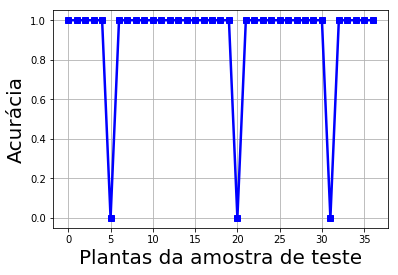

In [27]:
#Coletando a acurácia para cada um dos exemplos de teste.
accuracy = []
for n in np.arange(0, len(test_y)):
    pred_y= dtree.predict(test_x[[n]])
    score = accuracy_score(pred_y, test_y[[n]])
    accuracy.append(score)
    
#Gráfico da acurácia vs os elementos no conjunto de teste.
import matplotlib.pyplot as plt 
n= np.arange(0,len(test_y))
plt.plot(n, accuracy, marker='s', linestyle='-', color="blue", linewidth=2.5)
plt.xlabel("Plantas da amostra de teste", fontsize=20)
plt.ylabel("Acurácia", fontsize=20)
plt.grid(True)
plt.show(True)

Como já era esperado, pela acurácia dada por 0.92 aproximadamente, o classificador errou 3 vezes, tendo uma taxa de erro igual a 0.08.